<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/HML3_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4 👼 Training Models
This chapter is mostly the mathematics and the idea behind the models that are used for training:)




In [1]:
# part 1: Linear Regression
import numpy as np

np.random.seed(42)
m = 100 # number of instances in the dataset

X = 2*np.random.rand(m,1) #column vector
y = 4+3* X +np.random.randn(m,1) #column vector #the randn part is to add noise
"""
rand() uses the uniform distribution on [0, 1] , while randn() 
uses the normal distribution with mean 0 and standard deviation 1.
"""


print("X: ", X)

print("y: ", y)

X:  [[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]
 [1.93916926]
 [1.55026565]
 [1.87899788]
 [1.7896547 ]
 [1.19579996]
 [1.84374847]
 [0.176985  ]
 [0.39196572]
 [0.09045458]
 [0.65066066]
 [0.77735458]
 [0.54269806]
 [1.65747502]
 [0.71350665]
 [0.56186902]
 [1.08539217]
 [0.28184845]
 [1.60439396]
 [0.14910129]
 [1.97377387]
 [1.54448954]
 [

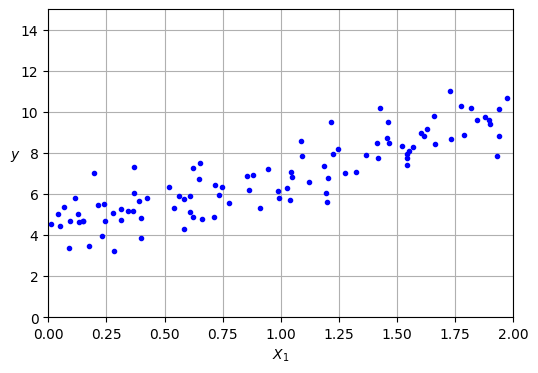

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize= (6,4))
#plt.scatter(X, y, c="blue")
plt.plot(X,y, "b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2,0, 15])
plt.grid()

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [5]:
# making the predictions:

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance

print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [6]:
y_predict = X_new_b @theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

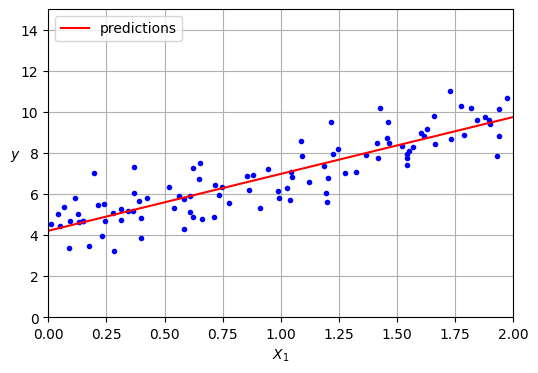

In [7]:
plt.figure(figsize= (6,4))
#plt.scatter(X, y, c="blue")
plt.plot(X,y, "b.")
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation = 0)
plt.legend(loc="upper left")
plt.axis([0, 2,0, 15])
plt.grid()

In [8]:
# Now with scikit learn
from sklearn. linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
"""
Scikit-Learn separates the bias term (intercept_) from the feature
weights (coef_). The LinearRegression class is based on the scipy.linalg.lstsq()
function (the name stands for “least squares”)"""

'\nScikit-Learn separates the bias term (intercept_) from the feature\nweights (coef_). The LinearRegression class is based on the scipy.linalg.lstsq()\nfunction (the name stands for “least squares”)'

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
#directly calling the scipy linalg least squares:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [11]:
print(theta_best_svd)
print(s)
print(rank)
print(residuals)

[[4.21509616]
 [2.77011339]]
[14.37020392  4.11961067]
2
[80.6584564]


In [12]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

In [13]:
# gradient decsent?
eta = 0.1 #learning rate
n_epochs = 1000
m = len(X_b) #number of instances 

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized mode parameters

for epoch in range(n_epochs):
  gradients = 2/m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients
 # print(theta)


In [14]:
theta

array([[4.21509616],
       [2.77011339]])

[Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, ''),
 Text(0, 10.0, ''),
 Text(0, 12.0, ''),
 Text(0, 14.0, ''),
 Text(0, 16.0, '')]

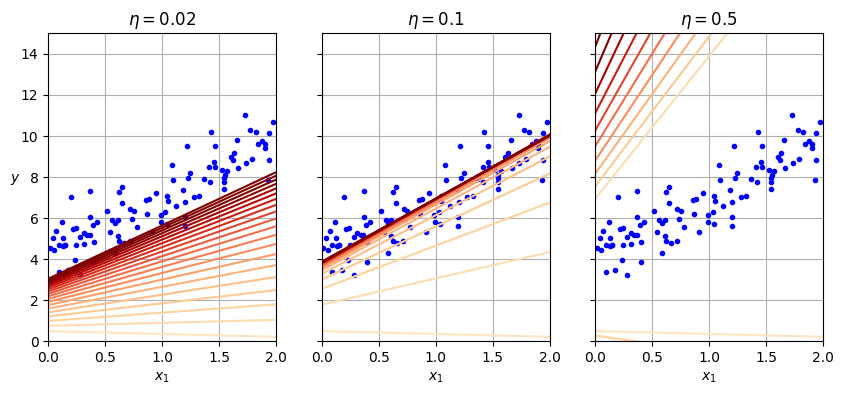

In [17]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_epochs = 1000
  n_shown = 20 #showing the first 20 steps of gradient descent
  theta_path = []
  for epoch in range(n_epochs):
    if epoch < n_shown: 
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15)) 
      # this part is to produce a shade of colors for different lines
      plt.plot(X_new, y_predict, linestyle = "solid", color = color)
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    theta_path.append(theta)
  plt.xlabel("$x_1$")
  plt.axis([0,2,0,15])
  plt.grid()
  plt.title(fr"$\eta = {eta}$")
  return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

plt.figure(figsize = (10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation  = 0)
plt.subplot(132)
plot_gradient_descent(theta, eta = 0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)
plt.gca().axes.yaxis.set_ticklabels([])



In [18]:
# Stochastic G D
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)

np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
  for iteration in range(m): # m is the number of instances in the dataset
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD do not devide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients


In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
m

100

In [21]:
xi

array([[1.        , 1.20223002]])

In [23]:
X_b[7 : 8]

array([[1.        , 1.73235229]])

In [24]:
X_b[8 : 9]

array([[1.        , 1.20223002]])

In [25]:
X_b[9]

array([1.        , 1.41614516])

In [26]:
X_b[8]

array([1.        , 1.20223002])

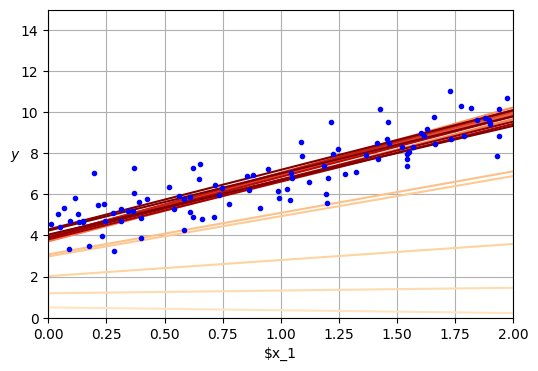

In [31]:
# Stochastic G D
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)


np.random.seed(42)
theta = np.random.randn(2,1) #random initialization

n_shown = 20
plt.figure(figsize = (6, 4))

for epoch in range(n_epochs):
  for iteration in range(m): # m is the number of instances in the dataset

    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      color = mpl. colors. rgb2hex (plt.cm.OrRd(iteration / n_shown + 0.15))
      plt.plot(X_new, y_predict, color = color)
    
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD do not devide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

plt.plot(X,y, "b.")
plt.xlabel("$x_1")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2, 0, 15])
plt.grid()